* Importing Liberaries

In [1]:
import numpy as np               # To Apply any Mathimatical Operation and deal With matrix_data

import pandas as pd              # For Loading datasets csv , exel , txt , sql Files and other

from scipy import stats          # To Apply Statistical Operation

from scipy.stats import norm     # To Apply Normal_ditribution

import matplotlib.pyplot as plt  # To Visualize data

import seaborn as sns            # To present Plots and charts of data

import warnings as w            # To ignore any Warnings notification

from sklearn.impute import SimpleImputer  # Fillning Missing datavalues

from sklearn.preprocessing import StandardScaler  # Model used To Normalize dat

from sklearn.model_selection import train_test_split  # For Spliting data into Train and Test

from sklearn.ensemble import RandomForestRegressor  # TO Apply Random_Forest_Regressor

w.filterwarnings("ignore")     # Apply Ignore Extention



* Laodind CSV_file_dataset

In [2]:
path = "G:\\Data Field\\D..S..Course\\Kagele_data\\train.csv"
dt_data = pd.read_csv(path)
dt_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


* Present describtion_Details of data

In [3]:
data_describton = dt_data.describe()
data_infos = dt_data.info()
data_skewenss = dt_data.skew()
data_kurst = dt_data.kurt()

print(f"\n=========\nThe data_describton ::\n {data_describton}\n========\nThe data_infos ::{data_infos}\n=======\n\
The data_skewenss :: \n{data_skewenss}\n========\nThe data_kurst ::\n {data_kurst}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

* present description of output only

In [4]:
output_feature = dt_data["SalePrice"]
output_feature_describtion = dt_data["SalePrice"].describe()
output_feature_skewnss = dt_data["SalePrice"].skew()
output_feature_kurst = dt_data["SalePrice"].kurt()
Q3 = dt_data.quantile(0.75)
Q1 = dt_data.quantile(0.25)

IQR = Q3 -Q1


print(f"output_feature :: \n{output_feature}\n\n=========\nThe output_feature_describtion ::\n\
{output_feature_describtion}\n\n=========\nThe output_feature_skewnss :: {output_feature_skewnss}\n====\n\
The output_feature_kurst :: {output_feature_kurst}\n====\nThe IQR :: \n{IQR}")

output_feature :: 
0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

The output_feature_describtion ::
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The output_feature_skewnss :: 1.8828757597682129
====
The output_feature_kurst :: 6.536281860064529
====
The IQR :: 
Id                 729.50
MSSubClass          50.00
LotFrontage         21.00
LotArea           4048.00
OverallQual          2.00
OverallCond          1.00
YearBuilt           46.00
YearRemodAdd        37.00
MasVnrArea         166.00
BsmtFinSF1         712.25
BsmtFinSF2           0.00
BsmtUnfSF          585.00
TotalBsmtSF        502.50
1stFlrSF           509.25
2ndFlrSF           728.00
LowQualFinSF 

* Present distribution plot of output columns

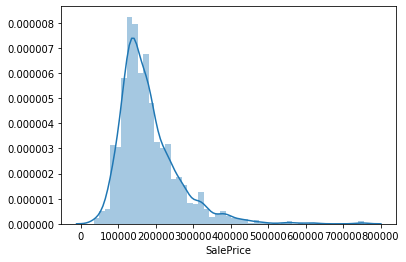

In [5]:
sns.distplot(dt_data["SalePrice"])

In [6]:
# present data_Columns
dt_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

* precent visualize mong some feature and output 

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

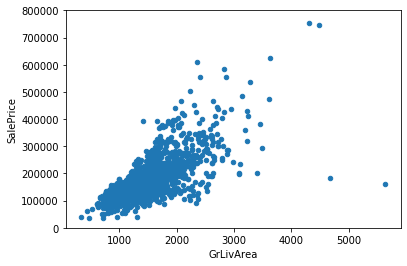

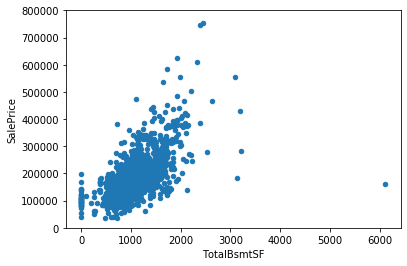

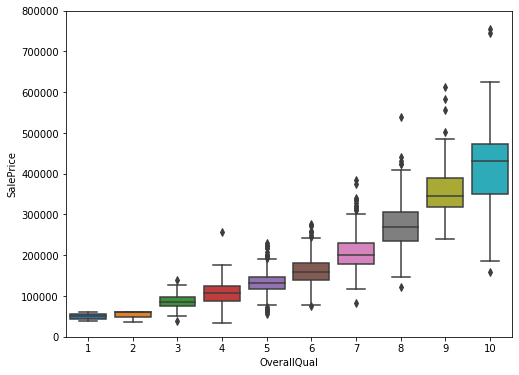

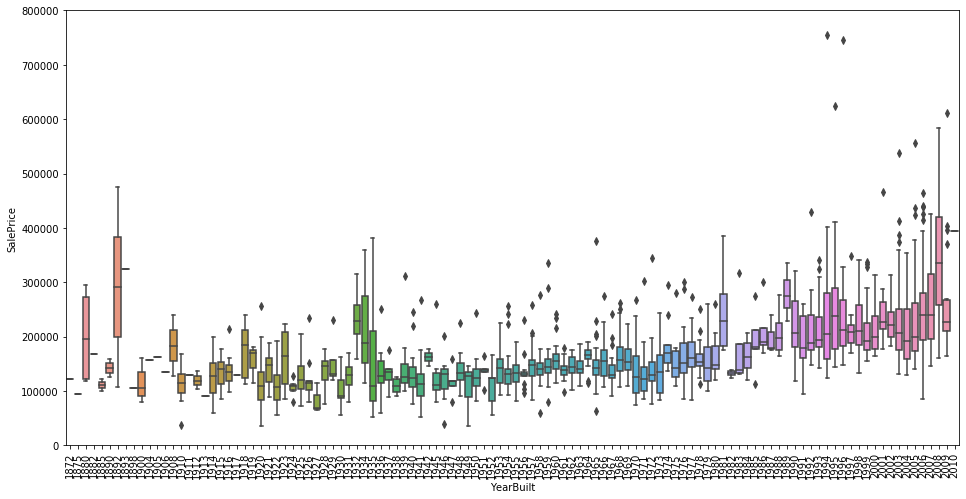

In [7]:
V1 = "GrLivArea"
V2 = "TotalBsmtSF"
V3 = "OverallQual"
V4 = "YearBuilt"

data1 = pd.concat([dt_data["SalePrice"] ,dt_data[V1]] , axis = 1)
data2 = pd.concat([dt_data["SalePrice"] , dt_data[V2]] , axis = 1)
data3 = pd.concat([dt_data["SalePrice"] , dt_data[V3]] , axis = 1)
data4 = pd.concat([dt_data["SalePrice"] , dt_data[V4]] , axis = 1)
# Scatter plots 

data1.plot.scatter( x = V1 , y = "SalePrice" , ylim = (0,800000))
data2.plot.scatter( x = V2 , y = "SalePrice" , ylim = (0 , 800000))

# Box plots

# The First Feature
f1 , ax1 = plt.subplots(figsize = (8 , 6))
fig1 = sns.boxplot( x = V3 , y = "SalePrice"  , data = data3)
fig1.axis(ymin = 0 , ymax = 800000)


# The Second Feature
f2 , ax2 = plt.subplots(figsize = (16 , 8))
fig2 = sns.boxplot( x = V4 , y = "SalePrice" , data = data4)
fig2.axis(ymin = 0 , ymax = 800000)
plt.xticks(rotation = 90)

* identfing Correlation of Features mong output

In [8]:
Corr_Matrix = dt_data.corr()
Corr_Matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


* identifing large Correlation Features With OutPut

In [9]:
k = 10
large_correlation = Corr_Matrix.nlargest( k , "SalePrice")["SalePrice"].index
Strong_Corr_Matrix = np.corrcoef(dt_data[large_correlation].values.T)

print(f"The large_correlation :: \n {large_correlation}\n======\nThe Strong_Corr_Matrix :: \
\n {Strong_Corr_Matrix}")

The large_correlation :: 
 Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')
The Strong_Corr_Matrix :: 
 [[1.         0.7909816  0.70862448 0.6404092  0.62343144 0.61358055
  0.60585218 0.56066376 0.53372316 0.52289733]
 [0.7909816  1.         0.59300743 0.60067072 0.56202176 0.5378085
  0.47622383 0.55059971 0.42745234 0.57232277]
 [0.70862448 0.59300743 1.         0.46724742 0.46899748 0.4548682
  0.56602397 0.63001165 0.82548937 0.19900971]
 [0.6404092  0.60067072 0.46724742 1.         0.88247541 0.43458483
  0.43931681 0.46967204 0.36228857 0.53785009]
 [0.62343144 0.56202176 0.46899748 0.88247541 1.         0.48666546
  0.48978165 0.40565621 0.33782212 0.47895382]
 [0.61358055 0.5378085  0.4548682  0.43458483 0.48666546 1.
  0.81952998 0.32372241 0.28557256 0.391452  ]
 [0.60585218 0.47622383 0.56602397 0.43931681 0.48978165 0.81952998
  1.         0.38063749

* present the Visualize heatmap mong strong correlation features and Output Column

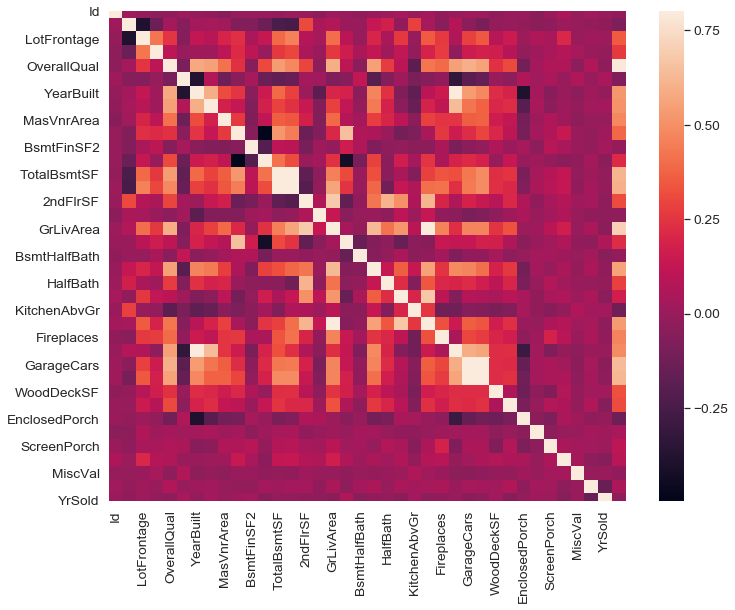

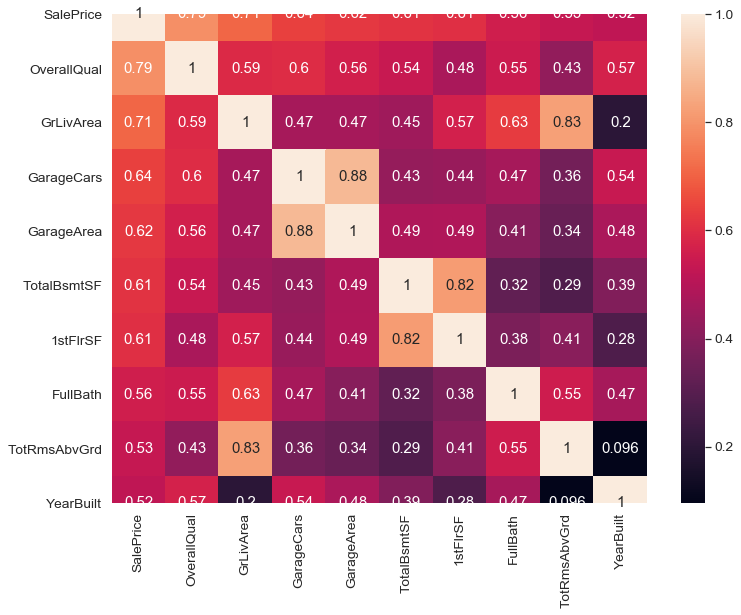

In [10]:
# The Normal Visualize
sns.set(font_scale = 1.25)
f3 , ax3 = plt.subplots(figsize = (12 , 9))
fig3 = sns.heatmap(Corr_Matrix , vmax=0.8 , square = True)

#The Strong Visualize 

f4 , ax4 = plt.subplots(figsize = (12,9))

fig4 = sns.heatmap(Strong_Corr_Matrix , annot = True , xticklabels= large_correlation.values , yticklabels = large_correlation.values )


* Present all Strong_Corelated features with output

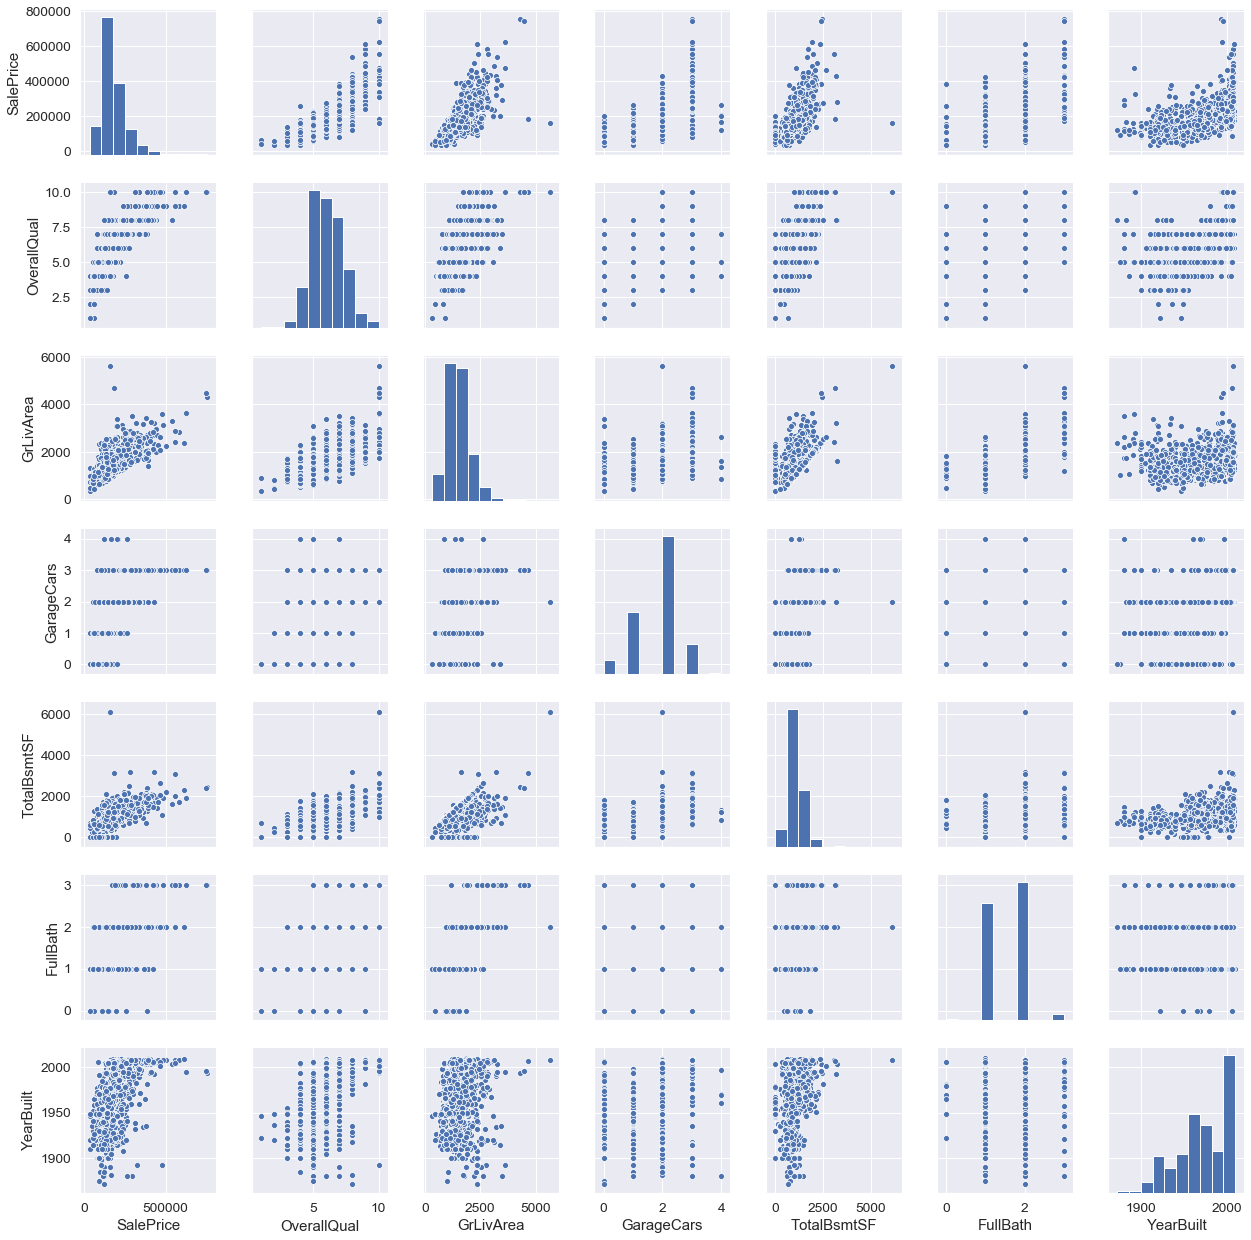

In [11]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(dt_data[cols] , size = 2.5)
plt.show()

*  Missing data Values

In [12]:
Tatal_missing_data = dt_data.isnull().sum().sort_values(ascending =False)
Precentage_Missing_data = (dt_data.isnull().sum()/dt_data.isnull().count()).sort_values(ascending = False)
Missing_data = pd.concat([Tatal_missing_data , Precentage_Missing_data] , axis = 1 , keys =["Total" , "Precet"])
print(f"The Tatal_missing_data ::\n {Tatal_missing_data}\n=======\nThe Precentage_Missing_data :: \
\n{Precentage_Missing_data}")

The Tatal_missing_data ::
 PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64
The Precentage_Missing_data :: 
PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
                   ...   
CentralAir       0.000000
SaleCondition    0.000000
Heating          0.000000
TotalBsmtSF      0.000000
Id               0.000000
Length: 81, dtype: float64


In [13]:
Missing_data

,Total,Precet
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
...,...,...
CentralAir,0,0.000000
SaleCondition,0,0.000000
Heating,0,0.000000
TotalBsmtSF,0,0.000000


* Handlling Missing Data

In [14]:
dt_data = dt_data.drop((Missing_data[Missing_data["Total"] > 1]).index , 1)
dt_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [15]:
dt_data = dt_data.drop(dt_data[dt_data["Electrical"].isnull()].index)
dt_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [16]:
dt_data.isnull().sum().max()

0

In [17]:
dt_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [18]:
dt_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

* Encoding categorical data

In [19]:
dt_data = pd.get_dummies(dt_data)
dt_data


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,0,0,1,0,0,0,0,1,0


In [20]:
scaling_price = StandardScaler().fit_transform(dt_data["SalePrice"][ : , np.newaxis])
scaling_price


array([[ 0.34704187],
       [ 0.0071701 ],
       [ 0.53585953],
       ...,
       [ 1.07713679],
       [-0.48847623],
       [-0.42081658]])

In [21]:
lower = scaling_price[scaling_price[: , 0].argsort()][ :10]
lower

array([[-1.83820775],
       [-1.83303414],
       [-1.80044422],
       [-1.78282123],
       [-1.77400974],
       [-1.62295562],
       [-1.6166617 ],
       [-1.58519209],
       [-1.58519209],
       [-1.57269236]])

In [22]:
higher = scaling_price[scaling_price[: , 0].argsort()][-10:]
higher

array([[3.82758058],
       [4.0395221 ],
       [4.49473628],
       [4.70872962],
       [4.728631  ],
       [5.06034585],
       [5.42191907],
       [5.58987866],
       [7.10041987],
       [7.22629831]])

* Normalizing output data

In [23]:
#Standerzation = StandardScaler().fit_transform(dt_data)
#Standerzation

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


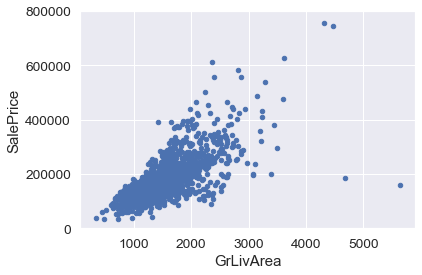

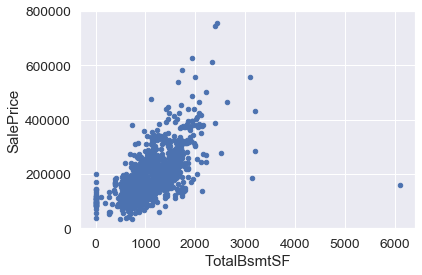

In [24]:
data1.plot.scatter( x = V1 , y = "SalePrice" , ylim = (0,800000))
data2.plot.scatter( x = V2 , y = "SalePrice" , ylim = (0 , 800000))

* Underfiting problems


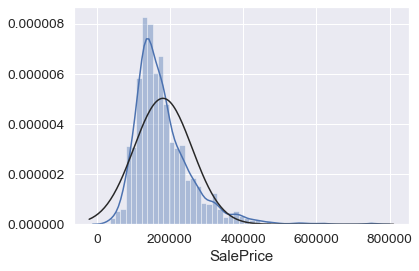

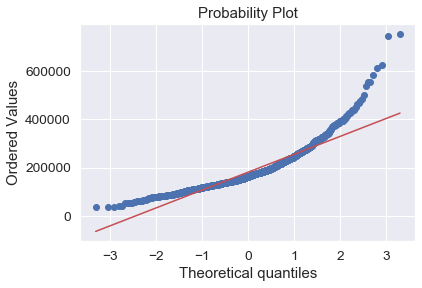

In [25]:
sns.distplot(dt_data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(dt_data['SalePrice'], plot=plt)

In [26]:
dt_data['SalePrice'] = np.log(dt_data['SalePrice'])

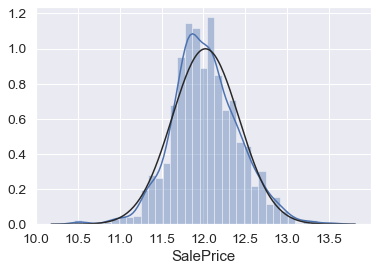

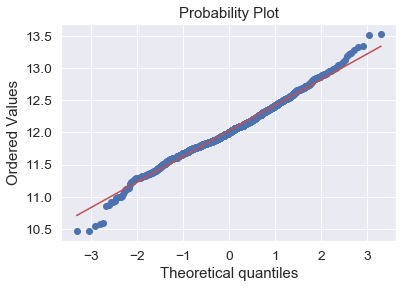

In [27]:
sns.distplot(dt_data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(dt_data['SalePrice'], plot=plt)

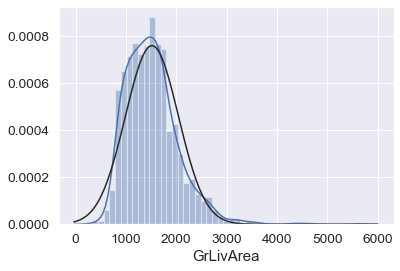

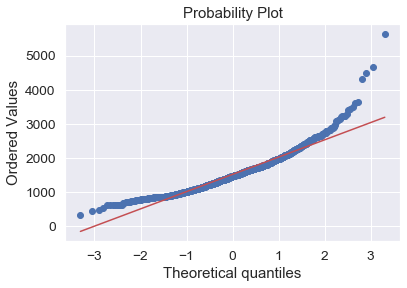

In [28]:
sns.distplot(dt_data["GrLivArea"]  , fit= norm)
fig = plt.figure()
res = stats.probplot(dt_data["GrLivArea"] , plot=plt)

In [29]:
dt_data["GrLivArea"] = np.log(dt_data["GrLivArea"])

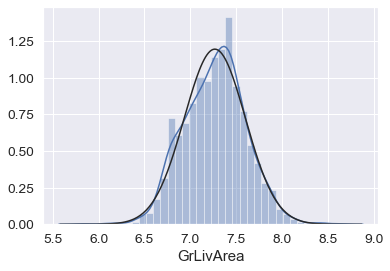

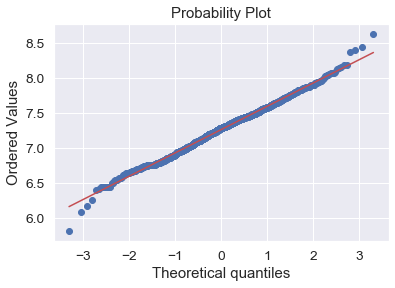

In [30]:
sns.distplot(dt_data["GrLivArea"]  , fit= norm)
fig = plt.figure()
res = stats.probplot(dt_data["GrLivArea"] , plot=plt)

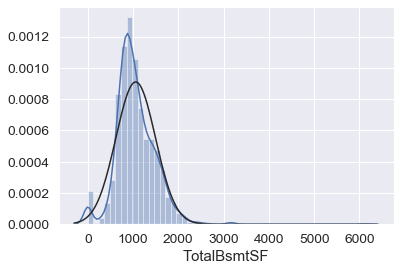

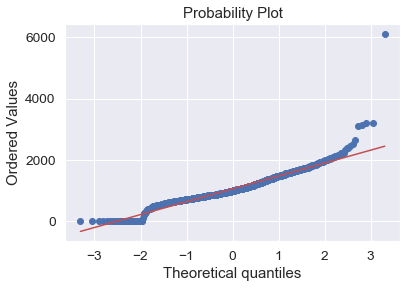

In [31]:
sns.distplot(dt_data["TotalBsmtSF"]  , fit= norm)
fig = plt.figure()
res = stats.probplot(dt_data["TotalBsmtSF"] , plot=plt)

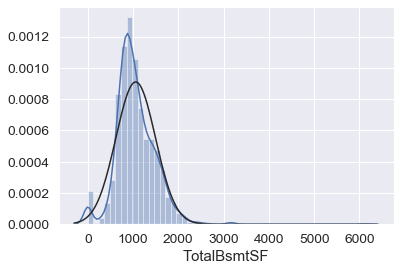

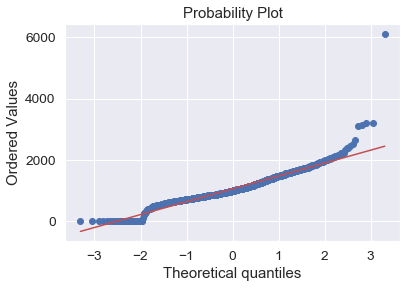

In [32]:
sns.distplot(dt_data["TotalBsmtSF"] , fit=norm)
fig = plt.figure()
res = stats.probplot(dt_data["TotalBsmtSF"] , plot = plt)

In [33]:
dt_data["new_col"] = pd.Series(len(dt_data["TotalBsmtSF"]) , index = dt_data.index)
dt_data["TotalBsmtSF"]

0        856
1       1262
2        920
3        756
4       1145
        ... 
1455     953
1456    1542
1457    1152
1458    1078
1459    1256
Name: TotalBsmtSF, Length: 1459, dtype: int64

In [34]:
dt_data["new_col"] = 0

dt_data.loc[dt_data["TotalBsmtSF"] > 0  , "new_col"] = 1

dt_data.loc[dt_data["new_col"] == 1 , "TotalBsmtSF"] = np.log(dt_data["TotalBsmtSF"])

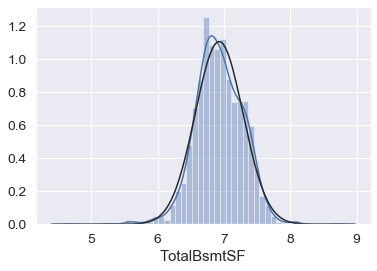

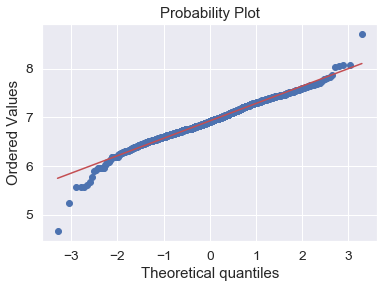

In [35]:
sns.distplot(dt_data[dt_data['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(dt_data[dt_data['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)


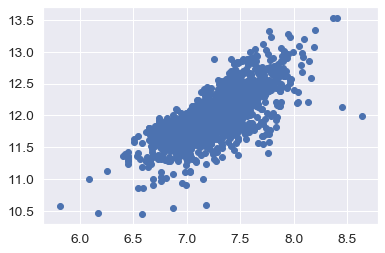

In [36]:
plt.scatter(dt_data['GrLivArea'], dt_data['SalePrice']);


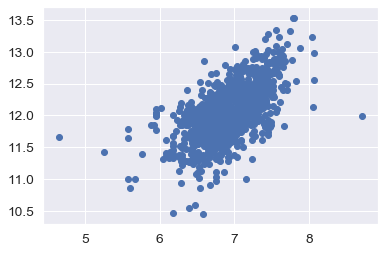

In [37]:
plt.scatter(dt_data[dt_data['TotalBsmtSF']>0]['TotalBsmtSF'], dt_data[dt_data['TotalBsmtSF']>0]['SalePrice']);
